## This dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://www.kaggle.com/henrysue/online-shoppers-intention
## The notebook presents an analysis with:
1. Supervised model predictions for buyers / non-buyers
2. Clustering and visualization of 'types' of shoppers
3. Experimentation on semi-supervised learning to propagate labels

## Description of data set:
### The data set is "online_shoppers_intention.csv". This data set represents skewed data, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
```
a. The dataset consists of 10 numerical and 8 categorical attributes.
b. The 'Revenue' attribute can be used as the class label.
c. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
d. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
e. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
f. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
g. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page and it represents the percentage that the page was seen in the last session. 
h. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
i. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
j. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
```

# Task 1: Predictive Models

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/online_shoppers_intent")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv("online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [ ]:
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
data = df.copy()

# Convert "VisitorType" into dummy variables

In [ ]:
data = pd.get_dummies(data,columns=["VisitorType"])
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1


# Convert "Month" into numerical data and "Revenue" into 1's and 0's

In [ ]:
data["Month"] = data["Month"].map({'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12})
data["Weekend"] = data["Weekend"].map({True:1, False:0})
data["Revenue"] = data["Revenue"].map({True:1, False:0})
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [ ]:
data["Month"].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

# Split training data (June to Dec) and test data (February to March)

In [ ]:
data_train = data[data["Month"] >= 6].copy()
data_test = data[data["Month"] <= 3].copy()

In [ ]:
X_train = data_train.drop("Revenue", axis=1)
y_train = data_train["Revenue"]
X_test = data_test.drop("Revenue", axis=1)
y_test = data_test["Revenue"]

In [ ]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

# Normalization

Code not shown but normalizing with StandardScaler improved linear model performance by ~2%

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.745378,-0.490464,-0.432226,-0.256217,-0.709192,-0.545345,-0.436535,-0.693132,-0.329683,0.0,-0.232151,-0.143083,-0.200266,-0.888658,0.195995,-0.560607,-0.446316,-0.111886,0.466096
1,0.097648,-0.273180,-0.432226,-0.256217,-0.518315,-0.548230,-0.436535,-0.423877,-0.329683,0.0,-2.605442,-0.143083,-0.200266,-0.484348,-0.728668,-0.560607,2.240567,-0.111886,-2.145483
2,-0.464370,-0.147782,-0.432226,-0.256217,-0.671017,-0.584414,-0.436535,-0.870274,1.726178,0.0,-0.232151,-1.136712,-0.735372,-0.080039,-0.266336,-0.560607,2.240567,-0.111886,-2.145483
3,0.940674,2.850231,-0.432226,-0.256217,0.226107,-0.036873,-0.436535,-0.772380,1.034701,0.0,-2.605442,-0.143083,-0.200266,1.132891,1.582989,-0.560607,2.240567,-0.111886,-2.145483
4,-0.745378,-0.490464,-0.432226,-0.256217,-0.690105,-0.635238,-0.436535,1.361713,-0.329683,0.0,-2.605442,-0.143083,-0.200266,1.537201,-0.728668,-0.560607,-0.446316,-0.111886,0.466096


In [ ]:
y_train

5455     0
5456     0
5457     1
5458     1
5459     0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 6875, dtype: int64

# Linear Model - Grid Search with Linear Support Vector Classifier

Starting with support vector machines to handle class imbalance

Trying out different regularization parameters C and tolerance for stopping criteria tol. Then trying out different optimization objectives ("dual" = True, False)

Cross-validating for f1-score for best overall performance

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = [
              {"C":[1, 10, 100], "tol":[1e-3, 1e-4, 1e-5]},
              {"dual":[False], "C":[1, 10, 100], "tol":[1e-3, 1e-4, 1e-5]}
]
linsvc_clf = LinearSVC(random_state=42)

grid_search_linsvc = GridSearchCV(linsvc_clf, param_grid, cv=5, scoring="f1", return_train_score=True)
grid_search_linsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'tol': [0.001, 0.0001, 1e-05]},
                         {'C': [1, 10, 100], 'dual': [False],
                          'tol': [0.001, 0.0001, 1e-05]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [ ]:
grid_search_linsvc.best_estimator_

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.001,
          verbose=0)

In [ ]:
from sklearn.metrics import classification_report
linsvc_pred = grid_search_linsvc.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test, linsvc_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1896
           1       0.73      0.55      0.63       195

    accuracy                           0.94      2091
   macro avg       0.84      0.77      0.80      2091
weighted avg       0.93      0.94      0.94      2091



Good results on predicting 0's, but recall is quite low for predicting 1's

# Nonlinear Model -  Random Forest Classifier Grid Search

Ensemble methods are good in general

Random Forest's are also good at handling class imbalance, intuitively it should also work better than LinearSVC as the data does not seem to be linear

Because the data is skewed, different class weights will be tried with grid search

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
              {"n_estimators":[1, 10, 100], "class_weight":[None, "balanced", "balanced_subsample"]}
]

rfc_clf = RandomForestClassifier(random_state=42)
grid_search_rfc = GridSearchCV(rfc_clf, param_grid, cv=5, scoring="f1", return_train_score=True)
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
grid_search_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rfc_best = grid_search_rfc.best_estimator_

In [ ]:
rfc_pred = rfc_best.predict(X_test)

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1896
           1       0.79      0.58      0.67       195

    accuracy                           0.95      2091
   macro avg       0.87      0.78      0.82      2091
weighted avg       0.94      0.95      0.94      2091



Achieved slightly better results with Random Forest Classifier than LinearSVC

# Nonlinear model - Support Vector Classifier Grid Search

Trying with nonlinear support vector classifier using the default "rbf" kernel

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(random_state=42)
param_grid = [
              {"C":[0.1, 1, 10, 100], "tol":[1e-3, 1e-4, 1e-5]}
]
grid_search_svc = GridSearchCV(svc_clf, param_grid, scoring="f1", cv=5, return_train_score=True)
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'tol': [0.001, 0.0001, 1e-05]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [ ]:
svm_best = grid_search_svc.best_estimator_

In [ ]:
svm_pred = svm_best.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1896
           1       0.44      0.52      0.48       195

    accuracy                           0.89      2091
   macro avg       0.69      0.73      0.71      2091
weighted avg       0.90      0.89      0.90      2091



# AutoML

To compare with previous model performances

In [ ]:
'''!pip install tpot'''

'!pip install tpot'

In [ ]:
'''from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=40, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)'''

'from tpot import TPOTClassifier\n\ntpot = TPOTClassifier(generations=5, population_size=40, verbosity=2, random_state=42)\ntpot.fit(X_train, y_train)'

In [ ]:
'''tpot_pred = tpot.predict(X_test)
print(classification_report(y_test, tpot_pred))'''

'tpot_pred = tpot.predict(X_test)\nprint(classification_report(y_test, tpot_pred))'

# Running TPOT gave XGBClassifier as the best model

# Classifier from AutoML

XGBoost is a more advanced ensemble method which progressively improves with each predictor in the ensemble

In [ ]:
import xgboost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.01, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0, random_state=42)

In [ ]:
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1896
           1       0.76      0.67      0.71       195

    accuracy                           0.95      2091
   macro avg       0.87      0.82      0.84      2091
weighted avg       0.95      0.95      0.95      2091



Significantly better results than support vector machines and random forests. Recall score of 0.67 versus 0.52 - 0.58

# Task 2: Clustering

# Use TSNE to reduce high dimensional features (18 of them) into two dimensions and plot

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

In [ ]:
X_train_tsne.shape

(6875, 2)

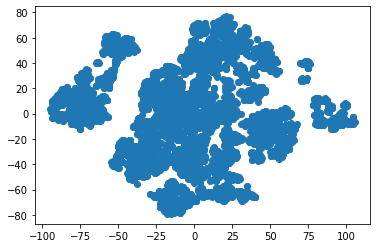

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

From this it is difficult to see how many clusters there are

# Use DBScan to cluster TSNE reduced data, try for different epsilon values (1 - 9)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_eps_grid = [DBSCAN(eps=eps).fit(X_train_tsne) for eps in range(1, 10)]

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

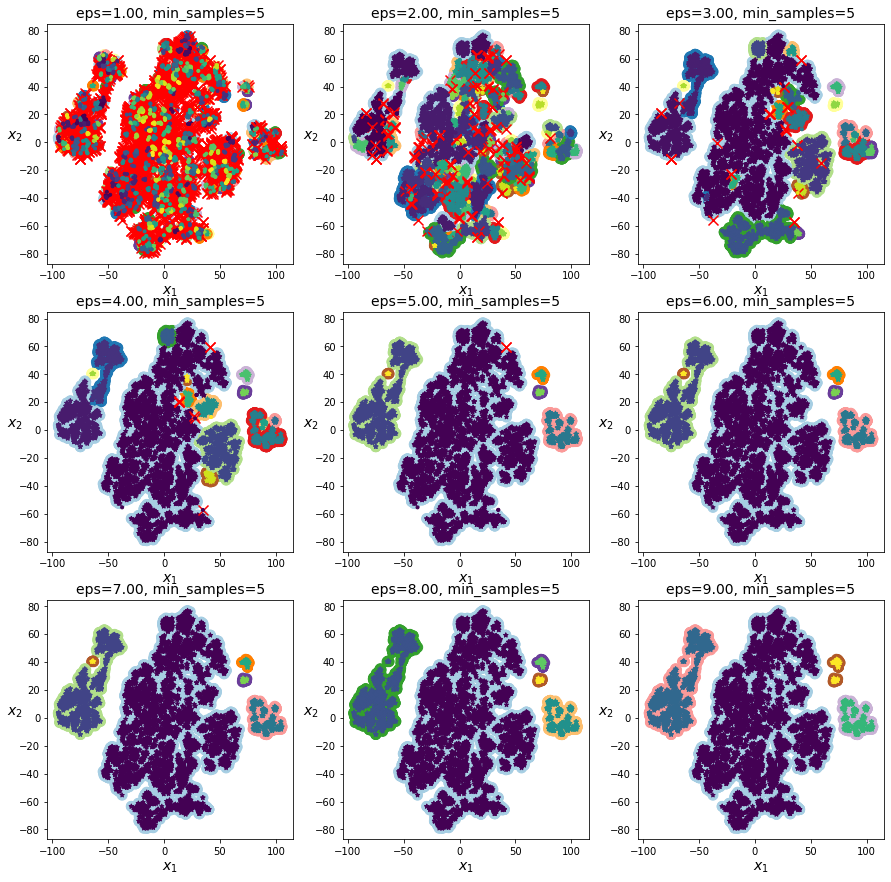

In [ ]:
plt.figure(figsize=(15,15))
for idx, dbscan in enumerate(dbscan_eps_grid):
  plt.subplot(330 + idx + 1)
  plot_dbscan(dbscan, X_train_tsne, size=100)
plt.show()

The plot with eps=7.00, min_samples=5 looks quite good (bottom left), there are 5 clusters and an outlier marked as a red cross

# Check how KMeans does

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit_predict(X_train_tsne)

array([2, 0, 0, ..., 4, 1, 0], dtype=int32)

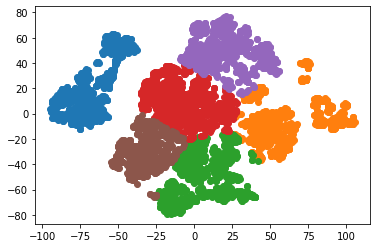

In [ ]:
for i in range(6):
  plt.scatter(X_train_tsne[kmeans.labels_ == i, 0], X_train_tsne[kmeans.labels_ == i, 1])

Doesn't look too good, going to use the DBScan model with eps=7.00 and min_samples=5 to cluster data and analyze those clusters

In [ ]:
# optimal cluster model
dbscan_optimal = dbscan_eps_grid[6]
unique_values = np.unique(dbscan_optimal.labels_)
unique_values

array([0, 1, 2, 3, 4, 5])

Cluster -1 is the outlier, going to omit that

# Give the data their assigned ClusterID's

In [ ]:
data_train.loc[:, "ClusterID"] = dbscan_optimal.labels_

In [ ]:
data_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,ClusterID
5455,0,0.000000,0,0.0,1,207.570248,0.0,0.007937,0.000000,0.0,10,2,2,1,5,0,0,0,0,1,0
5456,3,40.200000,0,0.0,11,201.133333,0.0,0.020000,0.000000,0.0,6,2,2,2,1,0,0,1,0,0,1
5457,1,63.400000,0,0.0,3,120.400000,0.0,0.000000,42.293068,0.0,10,1,1,3,3,0,1,1,0,0,1
5458,6,618.066667,0,0.0,50,1342.083333,0.0,0.004386,28.068050,0.0,6,2,2,6,11,0,1,1,0,0,1
5459,0,0.000000,0,0.0,2,7.000000,0.0,0.100000,0.000000,0.0,6,2,2,7,1,0,0,0,0,1,0


# Look at purchase/revenue percentage of clusters

In [ ]:

purchase_percentage = np.zeros(shape=unique_values.shape)
representation_percentage = np.zeros(shape=unique_values.shape)
total_customers = data_train.shape[0]

for index, item in enumerate(unique_values):
    num_customers_in_cluster = len(data_train[data_train["ClusterID"]==item])
    num_purchases_in_cluster = len(data_train[
                         (data_train["VisitorType_New_Visitor"]==1.0) &
                         (data_train["Revenue"]==1.0) &
                         (data_train["ClusterID"]==item)
    ])
    representation_percentage[index] = num_customers_in_cluster / total_customers * 100
    purchase_percentage[index] = num_purchases_in_cluster / num_customers_in_cluster * 100

Representation Percentage= [77.90545455 16.04363636  4.72727273  0.75636364  0.48        0.08727273]
Purchase Percentage= [ 0.1120239  26.20126927  0.          0.          0.         50.        ]


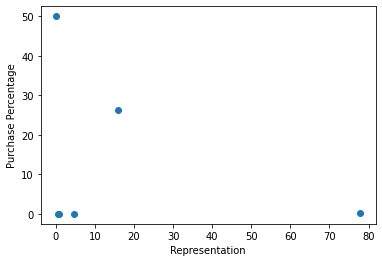

In [ ]:
print('Representation Percentage=',(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

The cluster with the highest representation percentage has a low percentage of revenue among the people within the cluster

# Put cluster information into a table to compare and look at features that stand out for each cluster

Add "ClusterSize" (the amount of people within that cluster) and "TotalRevenue" (the cluster's contribution to the total revenue) to the table

In [ ]:
cluster_info_list = []
total_revenue = len(data_train[data_train["Revenue"]==1])
for cluster_id in range(0, 6):
  cluster_info = data_train[data_train["ClusterID"]==cluster_id].mean()
  cluster_info["ClusterSize"] = len(data_train[data_train["ClusterID"]==cluster_id])
  cluster_info["TotalRevenue"] = len(data_train[(data_train["ClusterID"]==cluster_id) & (data_train["Revenue"]==1)]) / total_revenue
  cluster_info_list.append(cluster_info)

In [ ]:
pd.concat(cluster_info_list, axis=1)

,0,1,2,3,4,5
Administrative,2.867625,2.483228,0.012308,1.961538,0.696970,1.500000
Administrative_Duration,99.439402,77.777013,0.000000,82.699519,31.174242,22.125000
Informational,0.676624,0.288305,0.012308,0.230769,0.090909,0.666667
Informational_Duration,47.966356,14.521633,0.000000,5.399359,21.590909,135.916667
ProductRelated,44.897685,18.244787,1.673846,16.307692,6.424242,18.500000
ProductRelated_Duration,1689.021562,625.894117,15.051590,781.284944,238.108976,384.233333
BounceRates,0.011807,0.002276,0.197321,0.024388,0.060870,0.000000
ExitRates,0.033132,0.018794,0.198219,0.043056,0.095324,0.012026
PageValues,6.517970,9.221434,0.000000,28.828207,1.431432,0.000000
SpecialDay,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Cluster 0 - Returning "window" shoppers (highest product related duration, mostly returning visitors, makes up most of total revenue)

Cluster 1 - New buyers (only consists of new visitors, moderate revenue)

Cluster 2 - Planned buyers (shortest product related duration, high revenue)

Cluster 3 - Decisive buyers (highest page value, so least page views before making a transaction)

Cluster 4 - Non buyers (lowest revenue and total revenue)

Cluster 5 - Weekend buyers (high proportion of purchases made during weekends, new visitors, highest revenue percentage)

# Task 3: Semi-supervised labelling model, training with vs without semi-supervised labelled data

In [ ]:
data_semi_train = data[data["Month"] >= 6].copy()
data_semi_test = data[data["Month"] <= 3].copy()

In [ ]:
oct_to_dec_indices = np.where(data_semi_train["Month"] >= 10)[0]

In [ ]:
data_semi_train["Revenue"].unique()

array([0, 1])

In [ ]:
data_supervised = data[(data["Month"] >= 6) & (data["Month"] < 10)]

In [ ]:
X_train = data_supervised.drop("Revenue", axis=1)
y_train = data_supervised["Revenue"]

In [ ]:
X_train["Month"].value_counts()

9    448
8    433
7    432
6    288
Name: Month, dtype: int64

# Set labels for months October to December into -1

In [ ]:
X_semi_train = data_semi_train.drop("Revenue", axis=1).copy()
y_semi_train_full = data_semi_train["Revenue"].copy()
y_semi_train_part = data_semi_train["Revenue"].copy()
y_semi_train_part.iloc._setitem_with_indexer(oct_to_dec_indices, -1)

In [ ]:
np.unique(y_semi_train_part)

array([-1,  0,  1])

In [ ]:
X_test = data_semi_test.drop("Revenue", axis=1)
y_test = data_semi_test["Revenue"]

# Train on fully labelled data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
clf = XGBClassifier(learning_rate=0.01, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1896
           1       0.78      0.61      0.69       195

    accuracy                           0.95      2091
   macro avg       0.87      0.80      0.83      2091
weighted avg       0.94      0.95      0.94      2091



# Train partially-labeled data on LabelSpreading model

In [ ]:
scaler = StandardScaler()
X_semi_train = scaler.fit_transform(X_semi_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.semi_supervised import LabelSpreading

label_prop = LabelSpreading(gamma=0.25, max_iter=20)

label_prop.fit(X_semi_train, y_semi_train_part)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

# Compare true labels to propagated labels

In [ ]:
propagated_labels = pd.DataFrame(label_prop.transduction_, columns=["Revenue"])
propagated_labels_oct_to_dec = propagated_labels.iloc[oct_to_dec_indices]
true_labels_oct_to_dec = y_semi_train_full.iloc[oct_to_dec_indices]

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(true_labels_oct_to_dec, propagated_labels_oct_to_dec))

0.8111490329920364


# Train on propagated labels

In [ ]:
clf2 = XGBClassifier(learning_rate=0.01, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
clf2.fit(X_semi_train, np.ravel(propagated_labels))
pred = clf2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1896
           1       0.95      0.10      0.19       195

    accuracy                           0.92      2091
   macro avg       0.93      0.55      0.57      2091
weighted avg       0.92      0.92      0.88      2091



A significant dip in the recall performance

# Verify how well the label spreading model performed by looking at its recall score

In [ ]:
from sklearn.metrics import recall_score
print(recall_score(true_labels_oct_to_dec, propagated_labels_oct_to_dec))

0.10999083409715857


Looks like this label spreading model isn't very good at propagating these labels. The poor recall score from the label spreading process had carried over to the classification part

A good recall score is relevant in this problem as it is more important not to under-identify purchasers. Having purchasers go unnoticed can be quite problematic to the business.